In [1]:
# Basic statistic analysis notebook for filfreire's super-mario-experiments repository

## Read the data

In [2]:
import pandas as pd
import os

# Adjust the path if your files are in a different directory
path = '../data'  # e.g., './data'

all_data = []

for i in range(1, 31):
    filename = os.path.join(path, f'random-walk{i}.txt')
    df = pd.read_csv(filename, header=None, names=['x', 'Y'])
    df['File'] = i  # Add a column to identify the file
    all_data.append(df)

combined_data = pd.concat(all_data)

## Plot the data

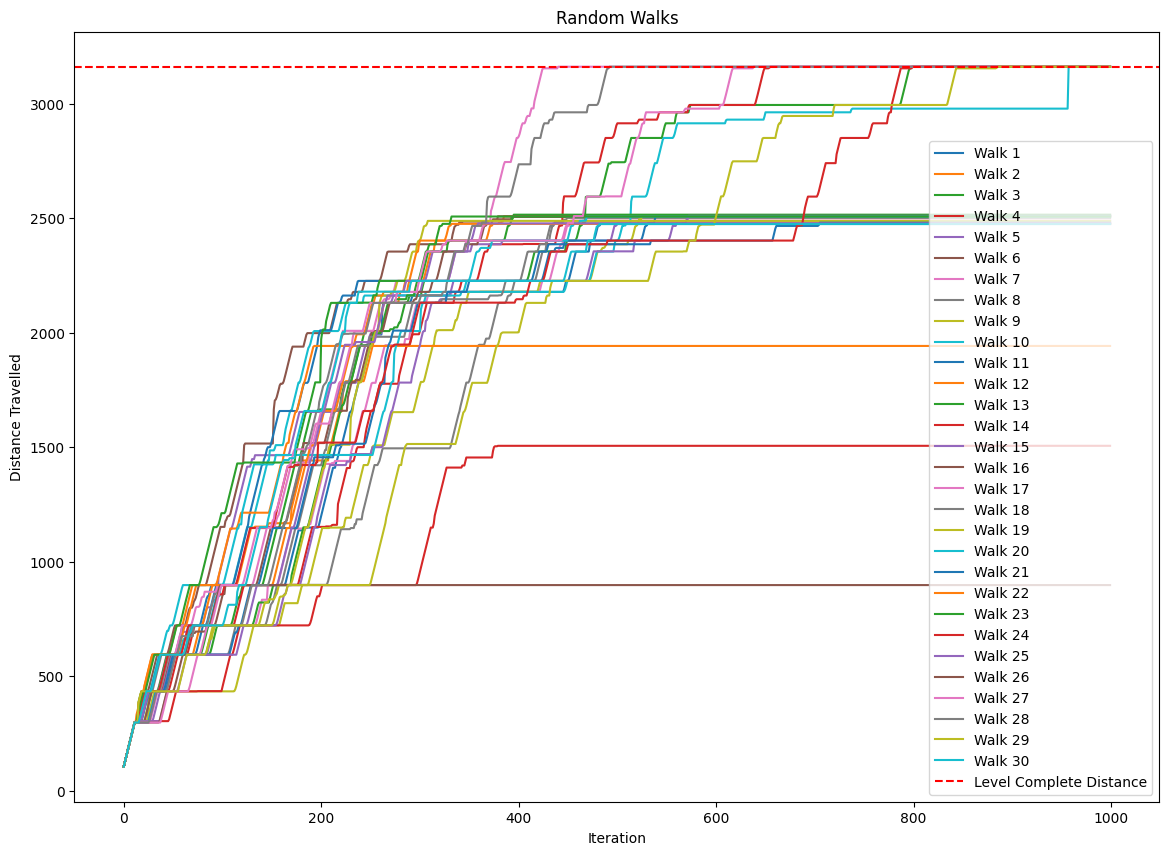

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 10))

for i in range(1, 31):
    subset = combined_data[combined_data['File'] == i].head(1000)  # Selecting the first 1000 iterations

    # Check if the distance reaches 3161 before 1000 iterations
    if any(subset['Y'] >= 3161):
        # Find the first occurrence where Y reaches or exceeds 3161
        index_to_fill = subset[subset['Y'] >= 3161].index.min()
        # Fill the remaining points with 3161
        subset.loc[index_to_fill:, 'Y'] = 3161

    # Ensure the length of the subset is 1000
    if len(subset) < 1000:
        # Append additional rows with 3161 to make it 1000 iterations long
        additional_rows = 1000 - len(subset)
        fill_data = pd.DataFrame({'x': range(subset['x'].iloc[-1] + 1, subset['x'].iloc[-1] + 1 + additional_rows),
                                  'Y': 3161,
                                  'File': i})
        subset = pd.concat([subset, fill_data], ignore_index=True)

    plt.plot(subset['x'], subset['Y'], label=f'Walk {i}')

plt.axhline(y=3161, color='r', linestyle='--', label='Level Complete Distance')

plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Distance Travelled', fontsize=10)
plt.title('Random Walks', fontsize=12)
plt.legend(fontsize=8)  # Reduce legend font size
plt.legend()
plt.show()

## Statistic analysis

In [4]:
descriptive_stats = combined_data.groupby('File')['Y'].describe()
print(descriptive_stats)

       count         mean         std    min      25%     50%      75%     max
File                                                                          
1     1463.0  2162.204375  602.525214  105.0  2178.00  2475.0  2475.00  2475.0
2     1611.0  2266.167598  548.220368  105.0  2508.00  2508.0  2508.00  2508.0
3      799.0  2142.384230  868.941559  105.0  1665.00  2226.0  2994.00  3161.0
4      656.0  1900.644817  925.235767  105.0   899.00  2130.0  2850.00  3161.0
5     1332.0  2199.108859  562.093496  105.0  2355.00  2476.0  2476.00  2476.0
6     1526.0  2305.560944  499.680042  105.0  2495.00  2505.0  2505.00  2505.0
7     1240.0  2108.629032  653.886459  105.0  2162.00  2489.0  2489.00  2489.0
8     1382.0  2101.062952  672.082578  105.0  1751.50  2501.0  2501.00  2501.0
9     1122.0  2002.639037  751.914690  105.0  1653.00  2512.0  2512.00  2512.0
10     957.0  2296.112853  761.335822  105.0  2130.00  2333.0  2962.00  2978.0
11    1126.0  2173.205151  593.279404  105.0  2226.0

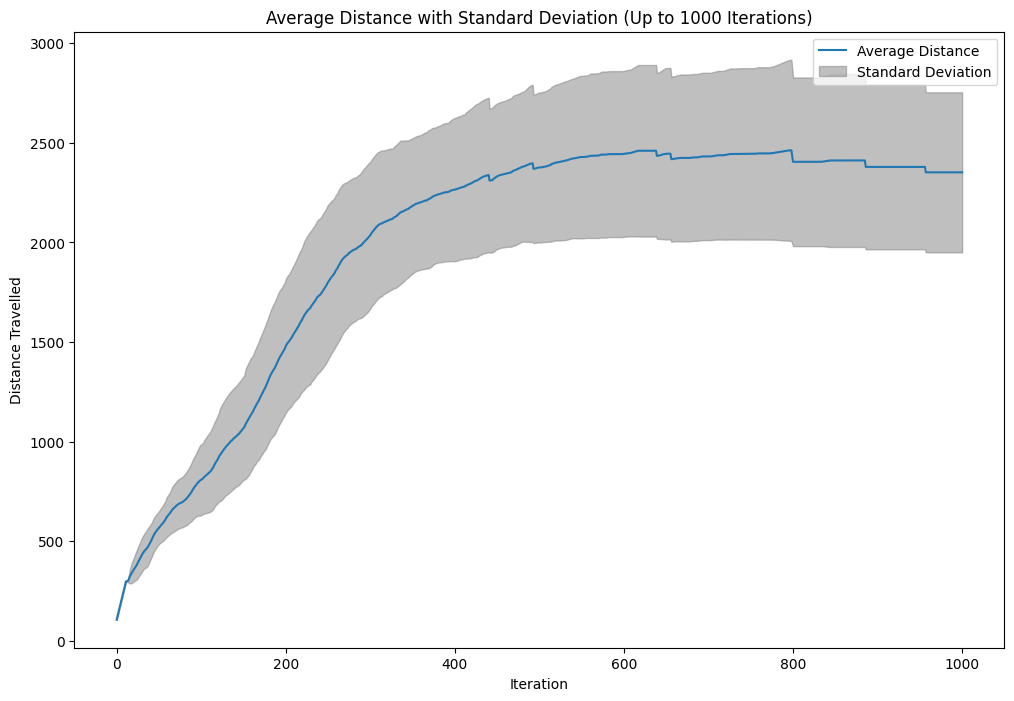

In [5]:
# Filter data to include only the first 1000 iterations
filtered_data = combined_data[combined_data['x'] <= 1000]

# Calculate the average and standard deviation for each iteration up to 1000
avg_std_data = filtered_data.groupby('x')['Y'].agg(['mean', 'std'])

# Plotting
plt.figure(figsize=(12, 8))

# Plot average
plt.plot(avg_std_data.index, avg_std_data['mean'], label='Average Distance')

# Plot standard deviation as shaded area
plt.fill_between(avg_std_data.index, avg_std_data['mean'] - avg_std_data['std'], 
                 avg_std_data['mean'] + avg_std_data['std'], color='gray', alpha=0.5, 
                 label='Standard Deviation')

plt.xlabel('Iteration', fontsize=10)
plt.ylabel('Distance Travelled', fontsize=10)
plt.title('Average Distance with Standard Deviation (Up to 1000 Iterations)', fontsize=12)
plt.legend()
plt.show()